In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import json

In [100]:
hum = (pd.read_csv('human_data_fm.csv').groupby('base_uuid').median().reset_index().drop('flipped', axis=1)
           .rename(columns={'human_fm': 'fm_human'}))
hum.head()

,base_uuid,participant_id,fm_human
0,0f18f0ad-f23d-4fc9-a761-3920c107550b,10004,0.700000
1,0f9a9c80-cdab-4071-8d56-27965b585a10,10004,0.727393
2,2bb1495b-1ef6-4943-bb48-662371f50b30,10004,0.830455
3,2f24428f-632d-4374-b0ca-cb3d0ae04bc5,10004,0.760970
4,2f452eee-c0bb-437c-bd4e-f35ee9fe9ff6,10004,0.737865


In [57]:
him = pd.read_csv('hebbian_inhibitive_clustering_model_results.csv').rename(columns={'model_fm': 'fm_hebbian_inhibition_model'})
him.base_uuid = him.base_uuid.astype(str)
him.head()

,Unnamed: 0,base_uuid,fm_hebbian_inhibition_model
0,0,0f18f0ad-f23d-4fc9-a761-3920c107550b,0.462599
1,1,0f9a9c80-cdab-4071-8d56-27965b585a10,0.596565
2,2,2bb1495b-1ef6-4943-bb48-662371f50b30,0.736512
3,3,2f24428f-632d-4374-b0ca-cb3d0ae04bc5,0.655586
4,4,2f452eee-c0bb-437c-bd4e-f35ee9fe9ff6,0.527794


In [110]:
conv = pd.read_csv('conv_median_fm_indicies.csv').rename(columns={"median_fm_index_per_base_uuid": "fm_conv",
                                                                  "Unnamed: 0": "base_uuid"})
conv.head()

,base_uuid,fm_conv
0,49f28baf-c341-4fb1-a75b-0ff70240de39,0.435697
1,37ecaaa0-dbb1-4b98-ad55-ce73229d5866,0.567480
2,2bb1495b-1ef6-4943-bb48-662371f50b30,0.690066
3,3c4d6c38-877b-41d2-b2b5-d2f74ef0970b,0.636364
4,37ce66b3-c54a-46ec-981d-96c33e8fba81,0.560193


In [118]:
autoen = pd.read_csv('autoencoder_fm.csv').rename(columns=dict(FM='fm_autoencoder', base_id="base_uuid"))
autoen.head()

,Unnamed: 0,base_uuid,fm_autoencoder
0,0,2bb1495b-1ef6-4943-bb48-662371f50b30,0.511203
1,1,6b397277-e2cf-4165-9f1a-32aeef65ebbc,0.547629
2,2,2f452eee-c0bb-437c-bd4e-f35ee9fe9ff6,0.551677
3,3,4fbeab87-3c1b-44f6-91c7-47cb4e50c315,0.521787
4,4,839dbbc1-445d-4298-95c3-38299943cfb6,0.421637


In [65]:
human_data_path = list(Path("/chompsky/techno/development/work/clustering-data-cleaning/build/normalized").glob('*.json'))[0]
records = []
for item in json.loads(human_data_path.read_bytes()):
    del item['clusters']
    records.append(item)
stimulus_info = pd.DataFrame.from_dict(records)[['base_uuid', 'group', 'number_of_points']].groupby(['base_uuid']).agg(dict(group='first', number_of_points='mean'))
stimulus_info.head()

,group,number_of_points
base_uuid,,
0f18f0ad-f23d-4fc9-a761-3920c107550b,clustered,35
0f9a9c80-cdab-4071-8d56-27965b585a10,disperse,35
2bb1495b-1ef6-4943-bb48-662371f50b30,clustered,25
2f24428f-632d-4374-b0ca-cb3d0ae04bc5,disperse,30
2f452eee-c0bb-437c-bd4e-f35ee9fe9ff6,clustered,25


In [66]:
new_names = {}
for name in ('kmeans', 'dbscan', 'optics'):
    new_names[name + "_fm_score"] = "fm_" + name + "_model"
null = pd.read_csv('null_hypothesis_data.csv').rename(columns=new_names)
null.base_uuid = null.base_uuid.astype(str)
null = null.groupby(['base_uuid']).median().reset_index()
null.head()

,base_uuid,Unnamed: 0,fm_kmeans_model,fm_dbscan_model,fm_optics_model
0,0f18f0ad-f23d-4fc9-a761-3920c107550b,2648.5,0.594954,0.847141,0.716863
1,0f9a9c80-cdab-4071-8d56-27965b585a10,2639.0,0.751100,0.636429,0.539709
2,2bb1495b-1ef6-4943-bb48-662371f50b30,2622.0,0.658232,0.559762,0.861702
3,2f24428f-632d-4374-b0ca-cb3d0ae04bc5,2650.5,0.813653,0.505146,0.693373
4,2f452eee-c0bb-437c-bd4e-f35ee9fe9ff6,2616.5,0.417752,0.959166,0.701242


In [119]:
dfs_to_merge=(hum, him, null, stimulus_info, conv, autoen)
merged = hum
for idx in range(1, len(dfs_to_merge)):
    merged = pd.merge(merged, dfs_to_merge[idx], on="base_uuid", how='inner')
    
merged.head()

,base_uuid,participant_id,fm_human,Unnamed: 0_x,fm_hebbian_inhibition_model,Unnamed: 0_y,fm_kmeans_model,fm_dbscan_model,fm_optics_model,group,number_of_points,fm_conv,Unnamed: 0,fm_autoencoder
0,0f18f0ad-f23d-4fc9-a761-3920c107550b,10004,0.700000,0,0.462599,2648.5,0.594954,0.847141,0.716863,clustered,35,0.605038,36,0.323186
1,0f9a9c80-cdab-4071-8d56-27965b585a10,10004,0.727393,1,0.596565,2639.0,0.751100,0.636429,0.539709,disperse,35,0.577350,51,0.472677
2,2bb1495b-1ef6-4943-bb48-662371f50b30,10004,0.830455,2,0.736512,2622.0,0.658232,0.559762,0.861702,clustered,25,0.690066,0,0.511203
3,2f24428f-632d-4374-b0ca-cb3d0ae04bc5,10004,0.760970,3,0.655586,2650.5,0.813653,0.505146,0.693373,disperse,30,0.596849,50,0.438445
4,2f452eee-c0bb-437c-bd4e-f35ee9fe9ff6,10004,0.737865,4,0.527794,2616.5,0.417752,0.959166,0.701242,clustered,25,0.637761,2,0.551677


In [122]:
fin = pd.melt(merged, value_vars=['fm_hebbian_inhibition_model',
                            'fm_kmeans_model',
                            'fm_dbscan_model',
                            'fm_optics_model',
                             'fm_human',
                             'fm_conv',
                                 'fm_autoencoder'],
        id_vars=["base_uuid", "number_of_points", "group"]).rename(columns={'variable': 'model'})
fin.head()
fin.to_csv("model_comparison.csv")

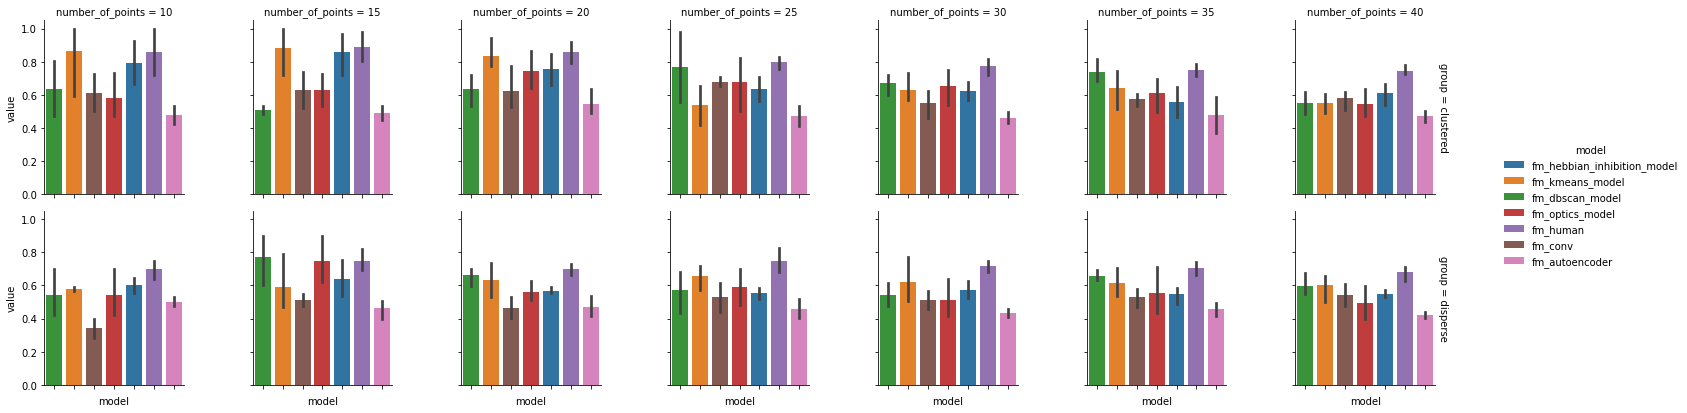

In [121]:
g = sns.FacetGrid(fin, col="number_of_points", row="group", hue="model", margin_titles=True)
g.map(sns.barplot, "model", "value", order=list(set(fin.model)))
g.add_legend()
g.set(xticklabels=[])